<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/ISE_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidoryEJ3regression.csv to Dane pomidoryEJ3regression.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Dane pomidoryEJ3regression.csv']),delimiter=';')

In [6]:
df

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,M
0,Daktyle,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.002363,0.040896,0.050755,0.002831,0.052790
1,Daktyle,1,1,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.001785,0.042695,0.052439,0.000054,0.052790
2,Daktyle,1,1,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,-0.002705,0.039837,0.052399,-0.002033,0.052790
3,barszcz diluted 45mlH2O5ml,2,2,1,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,0.018991,-0.025790,-0.017516,0.017514,0.051154
4,barszcz diluted 45mlH2O5ml,2,2,2,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,0.018885,-0.025828,-0.018449,0.015818,0.051154
5,barszcz diluted 45mlH2O5ml,2,2,3,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,0.023850,-0.026117,-0.018555,0.015969,0.051154
6,Tarczyn pikantny,3,3,1,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.013696,0.036756,0.041368,0.013792,0.063942
7,Tarczyn pikantny,3,3,2,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.015298,0.036688,0.042073,0.014737,0.063942
8,Tarczyn pikantny,3,3,3,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.014268,0.037570,0.042224,0.013817,0.063942
9,tymbark klasyczny E190127,4,3,1,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.014777,0.036836,0.042851,0.013724,0.063942


In [7]:
#lets check the correlation matrix of our dataframe
corr = df.corr()
plt.figure(figsize=(6,6))
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<ipython-input-7-3cf94f135b3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-7-3cf94f135b3d>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Kod,Rodzaj próbki,Powtórzenie,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,M
Kod,1.00,0.64,0.00,-0.39,-0.37,-0.30,-0.29,-0.30,-0.35,-0.34,-0.39,0.46,0.47,-0.38,-0.40
Rodzaj próbki,0.64,1.00,0.00,-0.67,-0.64,-0.60,-0.60,-0.62,-0.68,-0.66,-0.73,0.73,0.74,-0.72,-0.80
Powtórzenie,0.00,0.00,1.00,-0.04,-0.02,-0.02,0.01,-0.00,0.01,-0.04,-0.01,0.00,-0.00,-0.00,-0.00
DB 5,-0.39,-0.67,-0.04,1.00,1.00,0.98,0.97,0.97,0.98,0.98,0.97,-0.89,-0.86,0.97,0.88
DB 4,-0.37,-0.64,-0.02,1.00,1.00,0.98,0.98,0.98,0.98,0.98,0.96,-0.88,-0.86,0.96,0.87
V5,-0.30,-0.60,-0.02,0.98,0.98,1.00,0.99,0.99,0.97,0.97,0.94,-0.81,-0.78,0.94,0.87
V5_2?,-0.29,-0.60,0.01,0.97,0.98,0.99,1.00,0.99,0.97,0.96,0.94,-0.80,-0.77,0.95,0.87
V1,-0.30,-0.62,-0.00,0.97,0.98,0.99,0.99,1.00,0.97,0.96,0.95,-0.82,-0.79,0.95,0.88
K+ 3,-0.35,-0.68,0.01,0.98,0.98,0.97,0.97,0.97,1.00,0.99,0.97,-0.90,-0.88,0.98,0.90
K+ 5,-0.34,-0.66,-0.04,0.98,0.98,0.97,0.96,0.96,0.99,1.00,0.97,-0.90,-0.89,0.97,0.88


<Figure size 600x600 with 0 Axes>

In [8]:
# lets check if there are any columns with missing values
missv_df = (df.isna()
            .sum()
            .to_frame('missing_count')
            .assign(missing_ratio = lambda x: x['missing_count']/len(df))
            .loc[df.isna().any()] )
print(missv_df)

Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: []


### Split the dataset into the features, that will be used for the analysis X and the vector of values that we will want to predict y

In [ ]:
#lets choose the all the columns except the alcohol
X = df.iloc[:,1:].values

In [ ]:
#lets print first four rows to see if we got it right
print(X[:4,:])

[[1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00 2.800e-01
  2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00 2.600e-01
  1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00 3.000e-01
  2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00 2.400e-01
  2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]


In [ ]:
# we will try to predict the alcohol content so lets column number 1 to y
y = df.iloc[:,0].values

In [ ]:
# and check if its the alcohol content
print(y)

[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 14.06 12.93 13.71 12.85
 13.5  13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48
 13.28 13.05 13.07 14.22 13.56 13.41 13.88 13.24 13.05 14.21 14.38 13.9
 14.1  13.94 13.05 13.83 13.82 13.77 13.74 13.56 14.22 13.29 13.72 12.37
 12.33 12.64 13.67 12.37 12.17 12.37 13.11 12.37 13.34 12.21 12.29 13.86
 13.49 12.99 11.96 11.66 13.03 11.84 12.33 12.7  12.   12.72 12.08 13.05
 11.84 12.67 12.16 11.65 11.64 12.08 12.08 12.   12.69 12.29 11.62 12.47
 11.81 12.29 12.37 12.29 12.08 12.6  12.34 11.82 12.51 12.42 12.25 12.72
 12.22 11.61 11.46 12.52 11.76 11.41 12.08 11.03 11.82 12.42 12.77 12.
 11.45 11.56 12.42 13.05 11.87 12.07 12.43 11.79 12.37 12.04 12.86 12.88
 12.81 12.7  12.51 12.6  12.25 12.53 13.49 12.84 12.93 13.36 13.52 13.62
 12.25 13.16 13.88 12.87 13.32 13.08 13.5  12.79 13.11 13.23 12.58 13.17
 13.84 12.45 14.34 13.48 12.36 13.69 12.85 12.96 13.78

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
print(X_train[:5,:])

[[1.770e+00 2.100e+00 1.700e+01 1.070e+02 3.000e+00 3.000e+00 2.800e-01
  2.030e+00 5.040e+00 8.800e-01 3.350e+00 8.850e+02]
 [9.900e-01 1.950e+00 1.480e+01 1.360e+02 1.900e+00 1.850e+00 3.500e-01
  2.760e+00 3.400e+00 1.060e+00 2.310e+00 7.500e+02]
 [1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00 5.000e-01
  1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
 [1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00 3.200e-01
  1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
 [1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00 1.900e-01
  2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]]


In [ ]:
print(X_test[:5,:])

[[3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01 5.000e-01
  8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.610e+00 2.190e+00 2.250e+01 1.080e+02 2.000e+00 2.090e+00 3.400e-01
  1.610e+00 2.060e+00 1.060e+00 2.960e+00 3.450e+02]
 [3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00 1.700e-01
  1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]
 [1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00 1.400e-01
  2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
 [1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00 3.900e-01
  1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]]


In [ ]:
print(y_train)

[13.05 12.33 13.76 14.19 13.72 11.79 14.16 13.32 13.75 12.08 12.47 13.87
 11.87 12.6  13.11 13.05 13.83 13.78 12.08 12.2  14.75 12.25 14.21 12.29
 13.28 12.77 13.45 13.58 13.27 12.77 11.66 12.93 13.71 13.16 12.29 12.96
 14.39 12.67 14.23 12.25 11.84 12.37 13.56 12.29 11.64 12.34 14.38 13.67
 11.96 12.69 13.17 11.82 12.   12.07 11.46 14.1  13.51 13.68 13.16 13.07
 13.05 12.58 14.13 13.3  12.08 12.85 11.82 12.37 13.86 13.5  12.51 12.42
 12.81 13.23 11.65 12.37 12.52 12.82 14.34 12.17 13.63 12.08 13.41 13.62
 11.61 12.   13.82 13.39 13.03 13.24 13.5  14.37 13.08 13.94 12.88 13.4
 13.73 11.56 11.03 13.17 14.83 12.33 12.37 13.2  13.29 13.71 12.64 12.37
 14.06 13.4  13.36 12.16 11.81 13.34 13.05 13.52 12.45 13.84 12.84 13.88
 12.6  14.06 13.05 12.51 13.86 12.04 12.25 12.7  12.7  12.53 13.49 12.93
 13.05]


In [ ]:
print(y_test)

[13.69 12.42 13.64 12.21 13.77 13.49 11.76 14.38 12.36 12.72 14.12 13.24
 12.22 13.88 11.84 11.41 13.11 13.48 12.42 13.58 13.83 12.43 12.86 12.99
 13.56 12.85 13.9  14.02 14.3  12.87 12.29 13.48 12.79 14.2  11.45 11.62
 12.   12.72 12.08 14.1  13.74 12.37 13.73 14.22 14.22]


## Feature Scaling

### Choose one of the scalers A. B. or C.

In [ ]:
# choose one and '#' the others
# more options can be found in the documentation https://scikit-learn.org/stable/modules/preprocessing.html

### A. MIN MAX Scaler

In [ ]:
# MIN MAX Scaler -scales values to some specific range
# to change range simply change the values in the paranthesis of featre_range
from sklearn.preprocessing import MinMaxScaler
min_max_sc2 = MinMaxScaler(feature_range=(0,1))
X_train[:, :5] = min_max_sc2.fit_transform(X_train[:, :5])
X_test[:, :5] = min_max_sc2.transform(X_test[:, :5])

### B. Standarization

In [ ]:
# Standarization : zero mean and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### C. Normalization

In [ ]:
# Normalization : scaling individual samples to have unit norm
from sklearn.preprocessing import Normalizer
normalizer_sc = Normalizer().fit(X)  # fit does nothing each sample is treated separately
X_train[:, :5] = normalizer_sc.transform(X_train[:, :5])
X_test[:, :5] = normalizer_sc.transform(X_test[:, :5])

In [ ]:
print(X_train[:5,:])

[[1.77551020e-01 2.61437908e-01 3.35260116e-01 4.02173913e-01
  6.96551724e-01 3.00000000e+00 2.80000000e-01 2.03000000e+00
  5.04000000e+00 8.80000000e-01 3.35000000e+00 8.85000000e+02]
 [1.83673469e-02 1.63398693e-01 2.08092486e-01 7.17391304e-01
  3.17241379e-01 1.85000000e+00 3.50000000e-01 2.76000000e+00
  3.40000000e+00 1.06000000e+00 2.31000000e+00 7.50000000e+02]
 [1.28571429e-01 6.53594771e-01 4.79768786e-01 6.73913043e-01
  6.79310345e-01 2.74000000e+00 5.00000000e-01 1.35000000e+00
  5.40000000e+00 1.25000000e+00 3.00000000e+00 1.23500000e+03]
 [1.40816327e-01 5.09803922e-01 3.06358382e-01 4.13043478e-01
  8.00000000e-01 3.93000000e+00 3.20000000e-01 1.86000000e+00
  8.70000000e+00 1.23000000e+00 2.82000000e+00 1.68000000e+03]
 [1.08163265e-01 5.22875817e-01 3.17919075e-01 4.13043478e-01
  8.34482759e-01 3.67000000e+00 1.90000000e-01 2.04000000e+00
  6.80000000e+00 8.90000000e-01 2.87000000e+00 1.28500000e+03]]


In [ ]:
print(X_test[:5,:])

[[4.81632653e-01 5.49019608e-01 5.08670520e-01 4.02173913e-01
  2.93103448e-01 5.60000000e-01 5.00000000e-01 8.00000000e-01
  5.88000000e+00 9.60000000e-01 1.82000000e+00 6.80000000e+02]
 [1.44897959e-01 3.20261438e-01 6.53179191e-01 4.13043478e-01
  3.51724138e-01 2.09000000e+00 3.40000000e-01 1.61000000e+00
  2.06000000e+00 1.06000000e+00 2.96000000e+00 3.45000000e+02]
 [4.48979592e-01 5.62091503e-01 2.31213873e-01 5.00000000e-01
  5.93103448e-01 3.03000000e+00 1.70000000e-01 1.66000000e+00
  5.10000000e+00 9.60000000e-01 3.36000000e+00 8.45000000e+02]
 [5.91836735e-02 3.26797386e-02 3.23699422e-01 8.80434783e-01
  3.00000000e-01 1.28000000e+00 1.40000000e-01 2.50000000e+00
  2.85000000e+00 1.28000000e+00 3.07000000e+00 7.18000000e+02]
 [2.04081633e-01 6.40522876e-01 3.41040462e-01 4.89130435e-01
  6.96551724e-01 2.79000000e+00 3.90000000e-01 1.68000000e+00
  6.30000000e+00 1.13000000e+00 2.93000000e+00 1.37500000e+03]]


# Regression

# Partial Least Squares

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

### Apply the model to different parameters and check the opmimum number of Latent Variables

In [ ]:
def optimise_pls_cv(X_train, y_train, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X_train, y_train, cv=2)

    # Calculate scores
    r2 = r2_score(y_train, y_cv)
    mse = mean_squared_error(y_train, y_cv)

    return (r2, mse)

In [ ]:
# test with 12 components
r2s = []
mses = []
xticks = np.arange(1, 12)
for n_comp in xticks:
    r2, mse = optimise_pls_cv(X_train, y_train, n_comp)
    r2s.append(r2)
    mses.append(mse)

In [ ]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

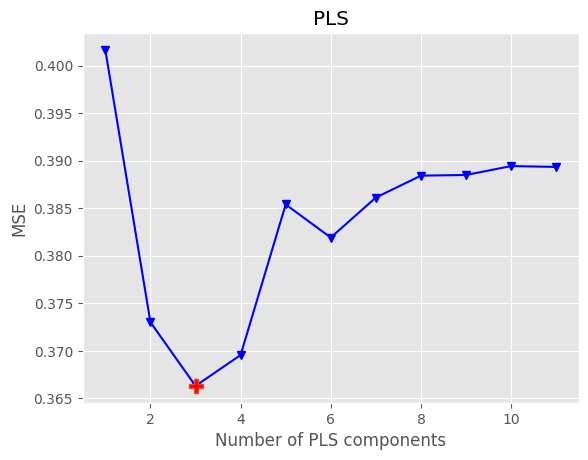

In [ ]:
plot_metrics(mses, 'MSE', 'min')

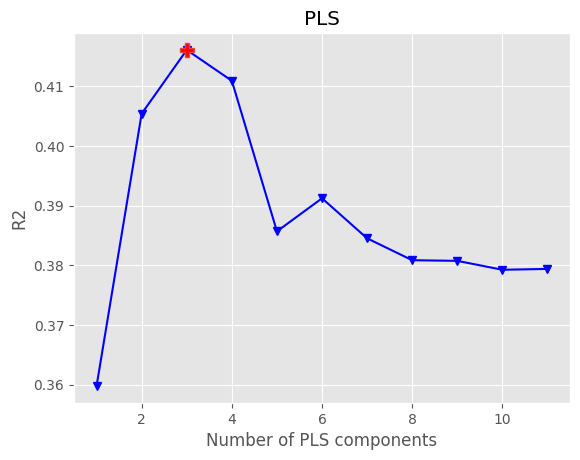

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")
# a negative value means that the the model performs worse than a regressor that would simply predict the mean of the target

PLS r-squared 0.620


### Now lets check the metrics for test data

In [ ]:
def optimise_pls_test(X_train, y_train, X_test, y_test, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X_train, y_train)

    # Calculate scores
    r2_test = r2_score(y_test, pls.predict(X_test))
    mse_test = mean_squared_error(y_test, pls.predict(X_test))

    return (r2_test, mse_test)

In [ ]:
# test with 7 components
r2s_test = []
mses_test = []
xticks_2 = np.arange(1, 12)
for n_comp in xticks_2:
    r2_test, mse_test = optimise_pls_test(X_train, y_train, X_test, y_test, n_comp)
    r2s_test.append(r2_test)
    mses_test.append(mse_test)

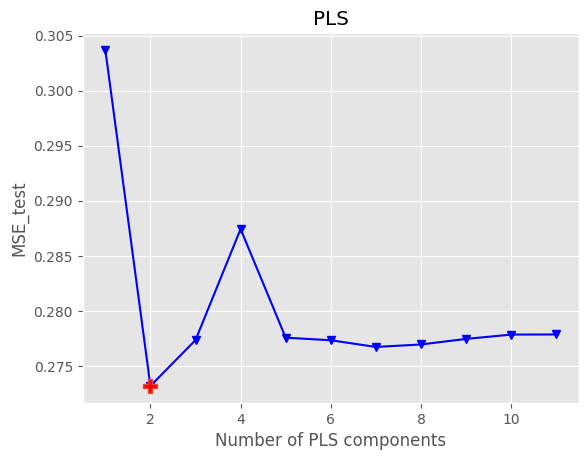

In [ ]:
plot_metrics(mses_test, 'MSE_test', 'min')

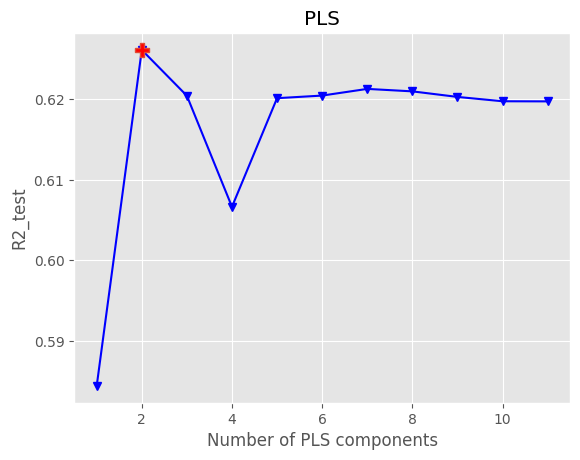

In [ ]:
plot_metrics(r2s_test, 'R2_test', 'max')

In [ ]:
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)
predictions =pls.predict(X_test)

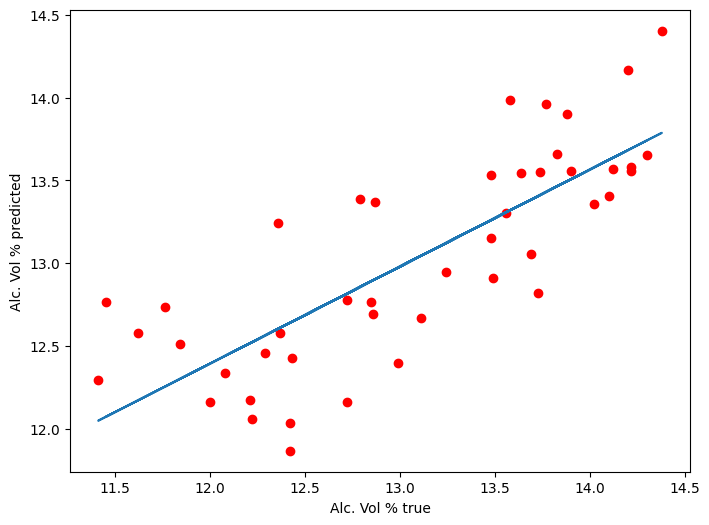

In [ ]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

MAE: 0.42235461096623084
MSE: 0.27735085459628156
RMSE: 0.5266411060639699


# Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions_lr = regressor.predict(X_test)

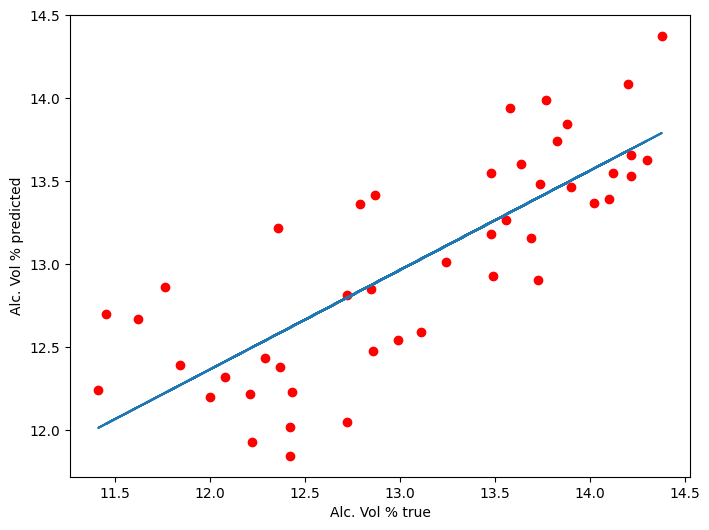

In [ ]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))

MAE: 0.42553421912996203
MSE: 0.2778589604687586
RMSE: 0.5271232877313984


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
predictions_poly = lin_reg_2.predict(X_poly_test)

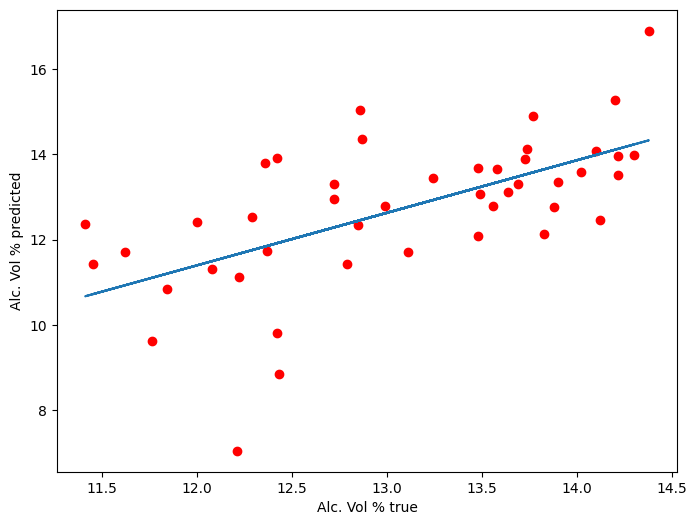

In [ ]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_poly,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_poly, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_poly))
print('MSE:', metrics.mean_squared_error(y_test, predictions_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_poly)))

MAE: 0.84740540553962
MSE: 1.5002115763160395
RMSE: 1.2248312440152886


# Principal Component Regression

In [ ]:
# first perform PCA and choose the number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X_train)

PCA(n_components=12)

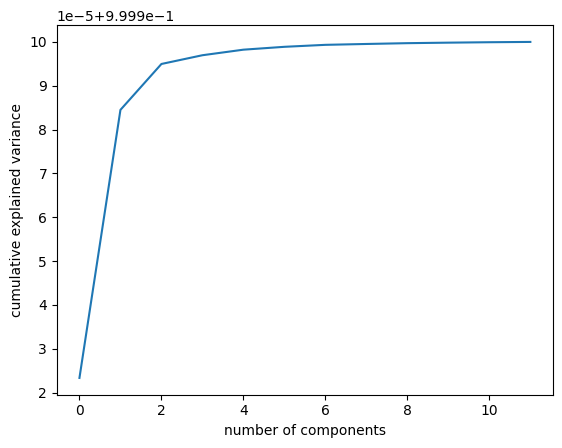

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# perform PCA with the chosen number of components, fit it only on the training data
# and use this model to transform both train and test sets
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [ ]:
# perform linear regression with the results of the PCA
regressor2 = LinearRegression()
regressor2.fit(X_pca_train, y_train)

LinearRegression()

In [ ]:
predictions_lr_pca = regressor2.predict(X_pca_test)

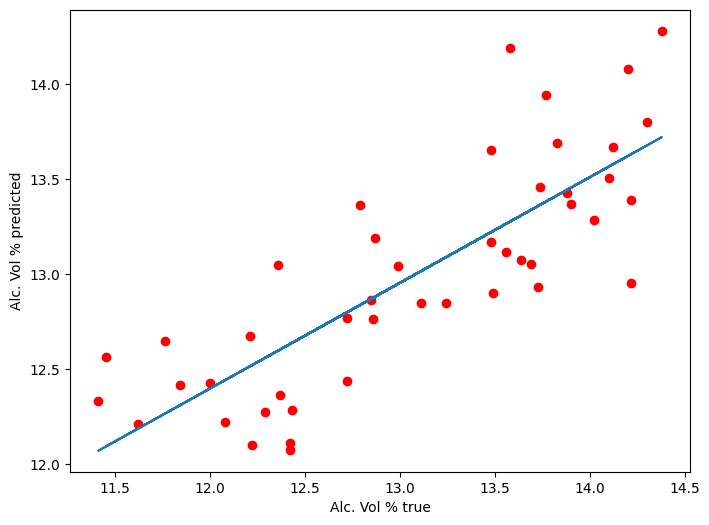

In [ ]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr_pca,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr_pca, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr_pca))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr_pca)))

MAE: 0.42427901786770467
MSE: 0.26957118719849393
RMSE: 0.5192024529973774
